In [1]:
from dataset_io import *
import torch
from torch import nn
from torch.autograd import Variable
from matplotlib import pyplot as plt
import torch.nn.functional as F
from torch.nn import Sigmoid

#===========================================

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, n_layers=1):
        super(RNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers

        self.rnn = nn.GRU(input_size, hidden_size, n_layers, dropout=0.01)
        self.out = nn.Linear(hidden_size, output_size)

    def forward(self, inputs, hidden):
        batch_size = inputs.size(1)
        
        # Turn (seq_len x batch_size x input_size) into (batch_size x input_size x seq_len) for CNN
        # inputs = inputs.transpose(0, 1)

        # Run through Conv1d and Pool1d layers
        p = inputs

        # Turn (batch_size x hidden_size x seq_len) back into (seq_len x batch_size x hidden_size) for RNN
        p = p.transpose(0,2)
        
        p = torch.tanh(p)
        output, hidden = self.rnn(p, hidden)
        conv_seq_len = output.size(0)
        output = output.view(conv_seq_len * batch_size, self.hidden_size) # Treating (conv_seq_len x batch_size) as batch_size for linear layer
        output = torch.tanh(self.out(output))
        output = output.view(conv_seq_len, -1, self.output_size)
        output = output.transpose(0,2)
        return output, hidden
    
    def init_hidden(self, batch_size):
        # This method generates the first hidden state of zeros which we'll use in the forward pass
        # We'll send the tensor holding the hidden state to the device we specified earlier as well
        hidden = torch.zeros(self.n_layers, batch_size, self.hidden_size)
        return hidden

#===================================================================
    
input_size = 1
hidden_size = 30
output_size = 1
batch_size = 50
n_layers = 5
seq_len = 150
n_epochs = 5

rnn = RNN(input_size, hidden_size, output_size, n_layers=n_layers)
print(rnn)
rnn.to(torch.device("cpu"))

criterion = nn.L1Loss()                          #?????????????????????????????????
print(criterion)
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)



hidden = rnn.init_hidden(batch_size)

for epoch in range(n_epochs):
    signals = read_contact_dataset(CONTACT_DATASET_NAME)
    TrS, TsS = GRU_get_training_set(signals, 150)
    training_set = parse_set2(TrS, batch_size)
    
    print('-----------------------')
    print('training set parameters')
    print('-----------------------')
    print(len(training_set))
    print(len(training_set[0]))
    print(len(training_set[0][0]))
    print(len(training_set[0][0][0]))
    print('-----------------------')
    
    for (batch_in, batch_tag) in training_set:
        batch_in /= np.max(batch_in)
        batch_tag /= np.max(batch_tag)
        inputs = Variable(torch.Tensor([batch_in]))
        targets = Variable(torch.Tensor([batch_tag]))
        optimizer.zero_grad() # Clears existing gradients from previous epoch
        inputs.to(torch.device("cpu"))
        outputs, hidden = rnn(inputs,None)
        loss = criterion(outputs, targets)
        loss.backward() # Does backpropagation and calculates gradients
        optimizer.step() # Updates the weights accordingly
    
        if epoch%1 == 0:
            print('Epoch: {}/{}.............'.format(epoch+1, n_epochs), end=' ')
            print("Loss: {:.4f}".format(loss.item()))


outputs, hidden = rnn(inputs, None)
print('outputs', outputs.size()) # conv_seq_len x batch_size x output_size
print('hidden', hidden.size()) # n_layers x batch_size x hidden_size

RNN(
  (rnn): GRU(1, 30, num_layers=5, dropout=0.01)
  (out): Linear(in_features=30, out_features=1, bias=True)
)
L1Loss()
-----------------------
training set parameters
-----------------------
286
2
50
150
-----------------------
Epoch: 1/5............. Loss: 0.2741
Epoch: 1/5............. Loss: 0.2011
Epoch: 1/5............. Loss: 0.0144
Epoch: 1/5............. Loss: 0.0373
Epoch: 1/5............. Loss: 0.0283
Epoch: 1/5............. Loss: 0.0126
Epoch: 1/5............. Loss: 0.0203
Epoch: 1/5............. Loss: 0.0238
Epoch: 1/5............. Loss: 0.0128
Epoch: 1/5............. Loss: 0.0369
Epoch: 1/5............. Loss: 0.0375
Epoch: 1/5............. Loss: 0.0178
Epoch: 1/5............. Loss: 0.0381
Epoch: 1/5............. Loss: 0.0483
Epoch: 1/5............. Loss: 0.0361
Epoch: 1/5............. Loss: 0.0097
Epoch: 1/5............. Loss: 0.0379
Epoch: 1/5............. Loss: 0.0480
Epoch: 1/5............. Loss: 0.0471
Epoch: 1/5............. Loss: 0.0343
Epoch: 1/5............. Loss

Epoch: 1/5............. Loss: 0.0073
Epoch: 1/5............. Loss: 0.0114
Epoch: 1/5............. Loss: 0.0114
Epoch: 1/5............. Loss: 0.0103
Epoch: 1/5............. Loss: 0.0092
Epoch: 1/5............. Loss: 0.0108
Epoch: 1/5............. Loss: 0.0084
Epoch: 1/5............. Loss: 0.0105
Epoch: 1/5............. Loss: 0.0120
Epoch: 1/5............. Loss: 0.0105
Epoch: 1/5............. Loss: 0.0098
Epoch: 1/5............. Loss: 0.0102
Epoch: 1/5............. Loss: 0.0087
Epoch: 1/5............. Loss: 0.0118
Epoch: 1/5............. Loss: 0.0118
Epoch: 1/5............. Loss: 0.0098
Epoch: 1/5............. Loss: 0.0082
Epoch: 1/5............. Loss: 0.0102
Epoch: 1/5............. Loss: 0.0095
Epoch: 1/5............. Loss: 0.0102
Epoch: 1/5............. Loss: 0.0125
Epoch: 1/5............. Loss: 0.0094
Epoch: 1/5............. Loss: 0.0078
Epoch: 1/5............. Loss: 0.0096
Epoch: 1/5............. Loss: 0.0079
Epoch: 1/5............. Loss: 0.0108
Epoch: 1/5............. Loss: 0.0125
E

Epoch: 2/5............. Loss: 0.0086
Epoch: 2/5............. Loss: 0.0081
Epoch: 2/5............. Loss: 0.0115
Epoch: 2/5............. Loss: 0.0123
Epoch: 2/5............. Loss: 0.0108
Epoch: 2/5............. Loss: 0.0067
Epoch: 2/5............. Loss: 0.0119
Epoch: 2/5............. Loss: 0.0131
Epoch: 2/5............. Loss: 0.0143
Epoch: 2/5............. Loss: 0.0113
Epoch: 2/5............. Loss: 0.0082
Epoch: 2/5............. Loss: 0.0142
Epoch: 2/5............. Loss: 0.0160
Epoch: 2/5............. Loss: 0.0140
Epoch: 2/5............. Loss: 0.0134
Epoch: 2/5............. Loss: 0.0074
Epoch: 2/5............. Loss: 0.0114
Epoch: 2/5............. Loss: 0.0142
Epoch: 2/5............. Loss: 0.0119
Epoch: 2/5............. Loss: 0.0118
Epoch: 2/5............. Loss: 0.0140
Epoch: 2/5............. Loss: 0.0111
Epoch: 2/5............. Loss: 0.0111
Epoch: 2/5............. Loss: 0.0098
Epoch: 2/5............. Loss: 0.0073
Epoch: 2/5............. Loss: 0.0091
Epoch: 2/5............. Loss: 0.0071
E

Epoch: 3/5............. Loss: 0.0103
Epoch: 3/5............. Loss: 0.0098
Epoch: 3/5............. Loss: 0.0086
Epoch: 3/5............. Loss: 0.0093
Epoch: 3/5............. Loss: 0.0106
Epoch: 3/5............. Loss: 0.0090
Epoch: 3/5............. Loss: 0.0079
Epoch: 3/5............. Loss: 0.0112
Epoch: 3/5............. Loss: 0.0130
Epoch: 3/5............. Loss: 0.0119
Epoch: 3/5............. Loss: 0.0097
Epoch: 3/5............. Loss: 0.0075
Epoch: 3/5............. Loss: 0.0087
Epoch: 3/5............. Loss: 0.0093
Epoch: 3/5............. Loss: 0.0074
Epoch: 3/5............. Loss: 0.0081
Epoch: 3/5............. Loss: 0.0077
Epoch: 3/5............. Loss: 0.0095
Epoch: 3/5............. Loss: 0.0091
Epoch: 3/5............. Loss: 0.0082
Epoch: 3/5............. Loss: 0.0074
Epoch: 3/5............. Loss: 0.0082
Epoch: 3/5............. Loss: 0.0087
Epoch: 3/5............. Loss: 0.0088
Epoch: 3/5............. Loss: 0.0094
Epoch: 3/5............. Loss: 0.0082
Epoch: 3/5............. Loss: 0.0079
E

Epoch: 4/5............. Loss: 0.0080
Epoch: 4/5............. Loss: 0.0075
Epoch: 4/5............. Loss: 0.0074
Epoch: 4/5............. Loss: 0.0092
Epoch: 4/5............. Loss: 0.0069
Epoch: 4/5............. Loss: 0.0097
Epoch: 4/5............. Loss: 0.0073
Epoch: 4/5............. Loss: 0.0077
Epoch: 4/5............. Loss: 0.0075
Epoch: 4/5............. Loss: 0.0081
Epoch: 4/5............. Loss: 0.0071
Epoch: 4/5............. Loss: 0.0064
Epoch: 4/5............. Loss: 0.0089
Epoch: 4/5............. Loss: 0.0085
Epoch: 4/5............. Loss: 0.0091
Epoch: 4/5............. Loss: 0.0109
Epoch: 4/5............. Loss: 0.0081
Epoch: 4/5............. Loss: 0.0094
Epoch: 4/5............. Loss: 0.0097
Epoch: 4/5............. Loss: 0.0100
Epoch: 4/5............. Loss: 0.0081
Epoch: 4/5............. Loss: 0.0085
Epoch: 4/5............. Loss: 0.0089
Epoch: 4/5............. Loss: 0.0100
Epoch: 4/5............. Loss: 0.0090
Epoch: 4/5............. Loss: 0.0088
Epoch: 4/5............. Loss: 0.0093
E

Epoch: 4/5............. Loss: 0.0107
Epoch: 4/5............. Loss: 0.0103
Epoch: 4/5............. Loss: 0.0082
Epoch: 4/5............. Loss: 0.0108
Epoch: 4/5............. Loss: 0.0076
Epoch: 4/5............. Loss: 0.0091
Epoch: 4/5............. Loss: 0.0105
Epoch: 4/5............. Loss: 0.0092
Epoch: 4/5............. Loss: 0.0085
Epoch: 4/5............. Loss: 0.0101
Epoch: 4/5............. Loss: 0.0097
Epoch: 4/5............. Loss: 0.0085
Epoch: 4/5............. Loss: 0.0082
Epoch: 4/5............. Loss: 0.0078
Epoch: 4/5............. Loss: 0.0087
Epoch: 4/5............. Loss: 0.0100
Epoch: 4/5............. Loss: 0.0096
Epoch: 4/5............. Loss: 0.0084
Epoch: 4/5............. Loss: 0.0088
Epoch: 4/5............. Loss: 0.0080
Epoch: 4/5............. Loss: 0.0094
Epoch: 4/5............. Loss: 0.0088
Epoch: 4/5............. Loss: 0.0088
Epoch: 4/5............. Loss: 0.0088
Epoch: 4/5............. Loss: 0.0096
Epoch: 4/5............. Loss: 0.0079
Epoch: 4/5............. Loss: 0.0088
E

Epoch: 5/5............. Loss: 0.0079
Epoch: 5/5............. Loss: 0.0075
Epoch: 5/5............. Loss: 0.0075
Epoch: 5/5............. Loss: 0.0076
Epoch: 5/5............. Loss: 0.0079
Epoch: 5/5............. Loss: 0.0076
Epoch: 5/5............. Loss: 0.0090
Epoch: 5/5............. Loss: 0.0092
Epoch: 5/5............. Loss: 0.0091
Epoch: 5/5............. Loss: 0.0087
Epoch: 5/5............. Loss: 0.0104
Epoch: 5/5............. Loss: 0.0093
Epoch: 5/5............. Loss: 0.0083
Epoch: 5/5............. Loss: 0.0080
Epoch: 5/5............. Loss: 0.0087
Epoch: 5/5............. Loss: 0.0070
Epoch: 5/5............. Loss: 0.0111
Epoch: 5/5............. Loss: 0.0089
Epoch: 5/5............. Loss: 0.0087
Epoch: 5/5............. Loss: 0.0092
Epoch: 5/5............. Loss: 0.0111
Epoch: 5/5............. Loss: 0.0095
Epoch: 5/5............. Loss: 0.0087
Epoch: 5/5............. Loss: 0.0103
Epoch: 5/5............. Loss: 0.0127
Epoch: 5/5............. Loss: 0.0113
Epoch: 5/5............. Loss: 0.0095
E

In [2]:
out = rnn(torch.Tensor([[TrS[1][0]]]), None)
print(out[0])
out1 = out[0]
out1 = out1.data.numpy()
print(out1[0][0])
print(out1.shape)

tensor([[[0.0006, 0.0007, 0.0007, 0.0007, 0.0007, 0.0007, 0.0006, 0.0006,
          0.0007, 0.0006, 0.0006, 0.0006, 0.0007, 0.0007, 0.0006, 0.0007,
          0.0007, 0.0007, 0.0007, 0.0007, 0.0007, 0.0007, 0.0007, 0.0007,
          0.0007, 0.0007, 0.0007, 0.0007, 0.0007, 0.0007, 0.0007, 0.0007,
          0.0006, 0.0007, 0.0007, 0.0006, 0.0007, 0.0007, 0.0006, 0.0006,
          0.0006, 0.0007, 0.0006, 0.0006, 0.0006, 0.0006, 0.0006, 0.0006,
          0.0007, 0.0007, 0.0006, 0.0006, 0.0006, 0.0007, 0.0005, 0.0006,
          0.0007, 0.0006, 0.0007, 0.0007, 0.0007, 0.0007, 0.0007, 0.0007,
          0.0007, 0.0007, 0.0006, 0.0007, 0.0007, 0.0006, 0.0006, 0.0006,
          0.0006, 0.0006, 0.0006, 0.0006, 0.0006, 0.0006, 0.0006, 0.0006,
          0.0007, 0.0007, 0.0007, 0.0006, 0.0006, 0.0006, 0.0006, 0.0007,
          0.0007, 0.0007, 0.0007, 0.0007, 0.0007, 0.0007, 0.0007, 0.0006,
          0.0007, 0.0007, 0.0007, 0.0007, 0.0006, 0.0007, 0.0007, 0.0007,
          0.0007, 0.0007, 0.0007, 0.00

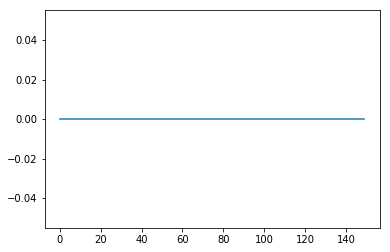

In [3]:
# y = np.asarray([TsS[0][1],out])
y = TrS[0][1]
# print(len(TsS[0][0]))
plt.plot(range(150), y)

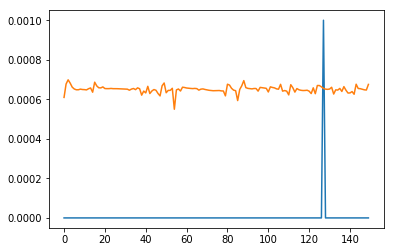

In [4]:
x = range(150)
y = [TrS[1][1]/1000, out1[0][0]]
plt.plot(x,y[0])
plt.plot(x,y[1])
# plt.plot(x, TsS[0][0]/1380)